## Introduction

The Wall Street is abuzz with the recent events related to stocks like GameStop, AMC Theatres, etc. The central to this is the subreddit WallStreetBets. It is on this subreddit, where a group of social media investors plotted a plan to annoy the hedge funds. 

In this analysis, I thought it would be interesting to analyse the activity on this group to get an idea about the following questions:

1. A look at the historic activity leading up to the recent events
2. A look at the most active authors
3. A look at the common phrases used in the posts

## Dataset

In order to perform the analysis, we will be using the dataset made available on Kaggle here : https://www.kaggle.com/unanimad/reddit-rwallstreetbets

The dataset is a csv file containing 12 columns and 8884063


In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from nltk import ngrams, word_tokenize
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize': (11, 8)})
sns.set_palette('pastel')
# nltk.download('punkt')

In [3]:
wallstreet_raw = pd.read_csv('r_wallstreetbets_posts.csv')
wallstreet_raw.head()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18
0,l98rqo,Are you guys idiots? The sub has been brigaded...,1,Crazed_waffle_party,NaN,moderator,0.0,[],1612084255,https://www.reddit.com/r/wallstreetbets/commen...,0,False
1,l98rpt,Your Game Stops here!!,1,Drahcir830,NaN,moderator,0.0,[],1612084251,https://www.reddit.com/r/wallstreetbets/commen...,0,False
2,l98rnz,u/DEEPFUCKINGVALUE dropping knowledge on the sub,1,TravellingGonzo,NaN,moderator,0.0,[],1612084245,https://www.reddit.com/r/wallstreetbets/commen...,0,False
3,l98rnm,"They'll learn, give them time",1,GloriousDioxide,NaN,moderator,0.0,[],1612084243,https://www.reddit.com/r/wallstreetbets/commen...,0,False
4,l98rn1,invest - stocks,1,ART_KH,NaN,moderator,0.0,[],1612084240,https://www.reddit.com/r/wallstreetbets/commen...,0,False


In [4]:
wallstreet_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884063 entries, 0 to 884062
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     884063 non-null  object 
 1   title                  884062 non-null  object 
 2   score                  884063 non-null  int64  
 3   author                 884063 non-null  object 
 4   author_flair_text      43685 non-null   object 
 5   removed_by             431701 non-null  object 
 6   total_awards_received  682643 non-null  float64
 7   awarders               651957 non-null  object 
 8   created_utc            884063 non-null  int64  
 9   full_link              884063 non-null  object 
 10  num_comments           884063 non-null  int64  
 11  over_18                884063 non-null  bool   
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 75.0+ MB


## Data Preparation

The columns of use for our analysis are:
- id : Unique identifier for each row of the dataset
- title : This is the text of the post
- author : The username of the author of the post
- created_utc : The utc time stamp of when the when the post was created

Hence, we will be limiting our analysis to these columns.

As can be seen in the previous cell, there are no missing values for any of these columns and hence would not be needing any treatment for handling them.

The only preprocessing will be to convert the utc time stamp to a datetime type.

In [5]:
wallstreet_raw['created_datetime'] = wallstreet_raw.created_utc.apply(datetime.datetime.fromtimestamp)
wallstreet_raw.head()

,id,title,score,author,author_flair_text,removed_by,total_awards_received,awarders,created_utc,full_link,num_comments,over_18,created_datetime
0,l98rqo,Are you guys idiots? The sub has been brigaded...,1,Crazed_waffle_party,NaN,moderator,0.0,[],1612084255,https://www.reddit.com/r/wallstreetbets/commen...,0,False,2021-01-31 14:40:55
1,l98rpt,Your Game Stops here!!,1,Drahcir830,NaN,moderator,0.0,[],1612084251,https://www.reddit.com/r/wallstreetbets/commen...,0,False,2021-01-31 14:40:51
2,l98rnz,u/DEEPFUCKINGVALUE dropping knowledge on the sub,1,TravellingGonzo,NaN,moderator,0.0,[],1612084245,https://www.reddit.com/r/wallstreetbets/commen...,0,False,2021-01-31 14:40:45
3,l98rnm,"They'll learn, give them time",1,GloriousDioxide,NaN,moderator,0.0,[],1612084243,https://www.reddit.com/r/wallstreetbets/commen...,0,False,2021-01-31 14:40:43
4,l98rn1,invest - stocks,1,ART_KH,NaN,moderator,0.0,[],1612084240,https://www.reddit.com/r/wallstreetbets/commen...,0,False,2021-01-31 14:40:40


The dataset will be limited to the columns (id, title, author, created_datetime) as the rest are of little interest.

In [6]:
wallstreet_filtered = wallstreet_raw[['id', 'title', 'author', 'created_datetime']].copy()
wallstreet_filtered.head()

,id,title,author,created_datetime
0,l98rqo,Are you guys idiots? The sub has been brigaded...,Crazed_waffle_party,2021-01-31 14:40:55
1,l98rpt,Your Game Stops here!!,Drahcir830,2021-01-31 14:40:51
2,l98rnz,u/DEEPFUCKINGVALUE dropping knowledge on the sub,TravellingGonzo,2021-01-31 14:40:45
3,l98rnm,"They'll learn, give them time",GloriousDioxide,2021-01-31 14:40:43
4,l98rn1,invest - stocks,ART_KH,2021-01-31 14:40:40


## The first question : How has the activity been on this subreddit?

In order to answer this, we will look at the number of post it has received over the years.

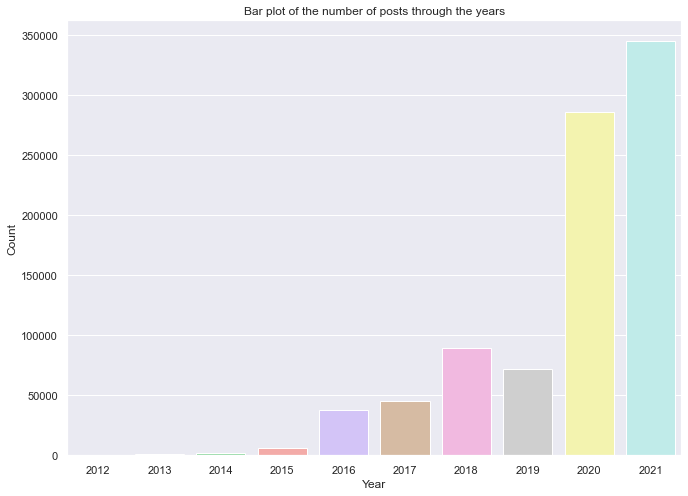

In [7]:
ax = sns.barplot(data=wallstreet_filtered.created_datetime.dt.year.value_counts().reset_index(), x = 'index', y = 'created_datetime')
ax.set(xlabel = 'Year', ylabel = 'Count', title = 'Bar plot of the number of posts through the years');

### Insights

- The data roots back to 2012, which could be the year of inception of this subreddit.

- The first major bit of activity is in 2018, which I believe is around the time that Bitcoin was rallying.

- The amount of activity in 2021 has surpassed that of 2020 even though it is just the beginning of February.

- Hence, the activity certainly has been at it's peak during the last couple of months.

A follow up on this is to look at the activity from first time post by authors.

We will look at the number of authors who posted for the first time over the years.

If the activity is from new followers of this subreddit, we should expect a large number of first time posts being made in the recent years. 

In [8]:
each_users_datetime_of_first_post = wallstreet_filtered.groupby(['author']).created_datetime.min().reset_index()
each_users_datetime_of_first_post.columns = ['author', 'datetime_of_first_post']
each_users_datetime_of_first_post['year'] = each_users_datetime_of_first_post.datetime_of_first_post.dt.year
each_users_datetime_of_first_post.head()

,author,datetime_of_first_post,year
0,-----------------in,2021-01-28 22:40:57,2021
1,----------_____,2020-02-19 21:41:31,2020
2,--------sam,2020-03-01 07:36:14,2020
3,-------I-------,2020-06-24 12:05:27,2020
4,------13------,2021-01-29 03:26:35,2021


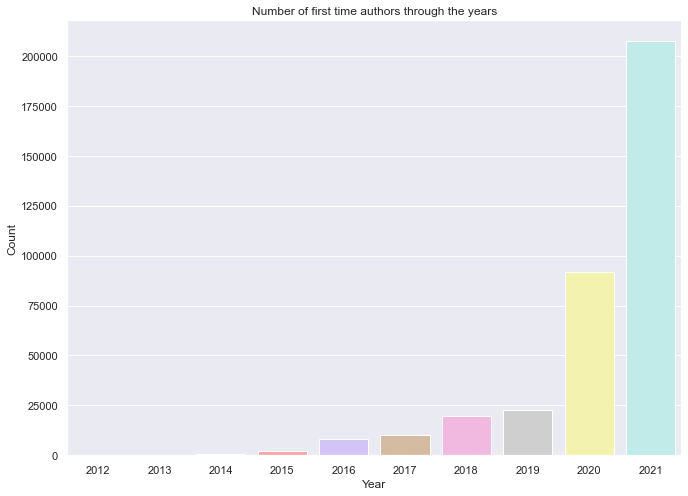

In [9]:
ax = sns.barplot(data=each_users_datetime_of_first_post.year.value_counts().reset_index(), x = 'index', y = 'year')
ax.set(xlabel = 'Year', ylabel = 'Count', title = 'Number of first time authors through the years');

### Insights 

- The above plot shows that 2021 is the year which saw the most new authors. That means the activity is from new followers rather than the existing followers.

- This reddit saw an amount of activity in 2021 that is more than the combined activity of the previous years.

- Considering we are only one month into 2021, this is staggering.


#### Having noticed that the majority of the traffic took place in 2020 and 2021, let's dig into these to see at what point this subreddit found momentum.

In [10]:
wallstreet_filtered.head()

,id,title,author,created_datetime
0,l98rqo,Are you guys idiots? The sub has been brigaded...,Crazed_waffle_party,2021-01-31 14:40:55
1,l98rpt,Your Game Stops here!!,Drahcir830,2021-01-31 14:40:51
2,l98rnz,u/DEEPFUCKINGVALUE dropping knowledge on the sub,TravellingGonzo,2021-01-31 14:40:45
3,l98rnm,"They'll learn, give them time",GloriousDioxide,2021-01-31 14:40:43
4,l98rn1,invest - stocks,ART_KH,2021-01-31 14:40:40


In [11]:
wallstreet_filtered_2020_2021 = wallstreet_filtered[wallstreet_filtered.created_datetime.dt.year.isin([2020, 2021])].copy()
wallstreet_filtered_2020_2021['month'] = wallstreet_filtered_2020_2021.created_datetime.dt.month
wallstreet_filtered_2020_2021['year'] = wallstreet_filtered_2020_2021.created_datetime.dt.year
wallstreet_filtered_2020_2021.head()

,id,title,author,created_datetime,month,year
0,l98rqo,Are you guys idiots? The sub has been brigaded...,Crazed_waffle_party,2021-01-31 14:40:55,1,2021
1,l98rpt,Your Game Stops here!!,Drahcir830,2021-01-31 14:40:51,1,2021
2,l98rnz,u/DEEPFUCKINGVALUE dropping knowledge on the sub,TravellingGonzo,2021-01-31 14:40:45,1,2021
3,l98rnm,"They'll learn, give them time",GloriousDioxide,2021-01-31 14:40:43,1,2021
4,l98rn1,invest - stocks,ART_KH,2021-01-31 14:40:40,1,2021


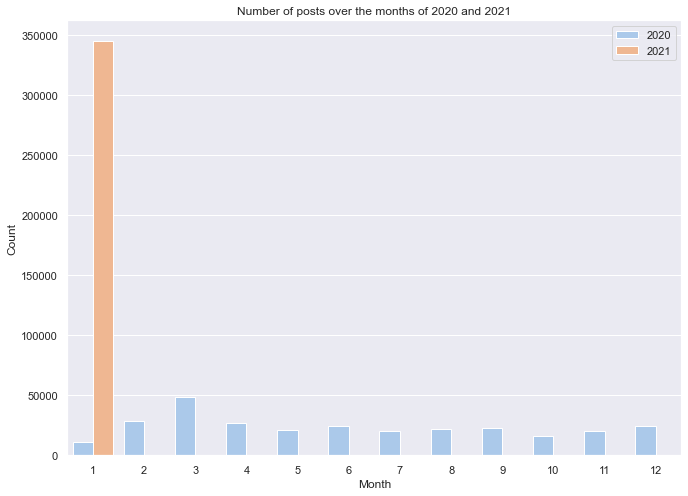

In [13]:
ax = sns.barplot(data= wallstreet_filtered_2020_2021.groupby(['year', 'month']).id.count().reset_index(), x= 'month', y= 'id', hue= 'year')
ax.set(xlabel = 'Month', ylabel = 'Count', title = 'Number of posts over the months of 2020 and 2021')
plt.legend(loc='upper right');

### Insight

It is clear as day that the traffic to this reddit only began at the start of 2021. Things were pretty normal before this.

Hence, for the rest of the analysis, we will focus on the activity in 2021 alone.

In [14]:
wallstreet_filtered_2021 = wallstreet_filtered[wallstreet_filtered.created_datetime.dt.year == 2021].copy()
wallstreet_filtered_2021['day'] = wallstreet_filtered_2021.created_datetime.dt.day
wallstreet_filtered_2021.head(10)

,id,title,author,created_datetime,day
0,l98rqo,Are you guys idiots? The sub has been brigaded...,Crazed_waffle_party,2021-01-31 14:40:55,31
1,l98rpt,Your Game Stops here!!,Drahcir830,2021-01-31 14:40:51,31
2,l98rnz,u/DEEPFUCKINGVALUE dropping knowledge on the sub,TravellingGonzo,2021-01-31 14:40:45,31
3,l98rnm,"They'll learn, give them time",GloriousDioxide,2021-01-31 14:40:43,31
4,l98rn1,invest - stocks,ART_KH,2021-01-31 14:40:40,31
5,l98rlu,The Next Move,danteheck97,2021-01-31 14:40:35,31
6,l98rk5,BEWARE OF THE TACTIC 2.0 🇺🇸GME AMC🚀,bd981,2021-01-31 14:40:29,31
7,l98rip,Reinforcements are Coming - KEEP HOLDING,npage34,2021-01-31 14:40:24,31
8,l98rhr,BEWARE OF THE TACTIC 2.0 🇺🇸🚀GME AMC🚀🇺🇸,bd981,2021-01-31 14:40:21,31
9,l98rhn,Help newbie,arve666,2021-01-31 14:40:21,31


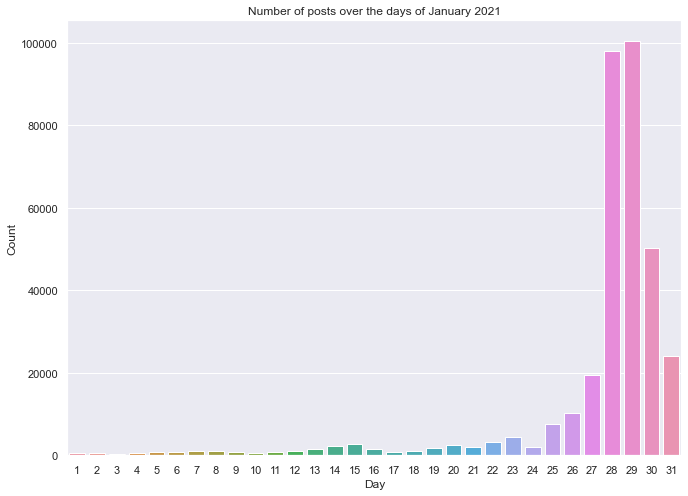

In [15]:
ax = sns.barplot(data= wallstreet_filtered_2021.groupby(['day']).id.count().reset_index(), x='day', y= 'id')
ax.set(xlabel = 'Day', ylabel = 'Count', title = 'Number of posts over the days of January 2021');

### Insight 

Looks like it was the 27th of January that kicked off activity on this Reddit.

## The next question of interest: Who were the most active authors?

These authors could be the most influential of the lot.

In [16]:
wallstreet_filtered_2021.author.value_counts().reset_index().rename(columns={'index': 'Author', 'author': 'Number of posts'})

,Author,Number of posts
0,[deleted],9682
1,PubertEHumphrey,76
2,dhiral1994,66
3,CappedCrib,58
4,keenfeed,54
...,...,...
226917,IBKR_Employee,1
226918,Icy_Detective6965,1
226919,thatboyaddison,1
226920,Wilks12345,1


### Insights

- Interesting. A large amount of comments were deleted by the moderator. Wonder why.

- This hinders my quest to find the most active authors.

- However, I will be ignoring the deleted comments and continue looking.



Let's visulize the activity pattern of the top 5 authors on this reddit.

In [17]:
top_5_active_authors = wallstreet_filtered_2021[ wallstreet_filtered_2021.author.isin(wallstreet_filtered_2021.author.value_counts()[1:6].index)]
top_5_active_authors.head(10)

,id,title,author,created_datetime,day
1514,l979ck,Robbin! Target is HLB in seoul,Complete-Screen-6435,2021-01-31 12:50:06,31
2269,l96kqa,OUR 💎 🙌 ARE READY 🚀🚀🚀,dhiral1994,2021-01-31 12:03:30,31
2381,l96h2g,OUR DIAMOND 💎 HANDS 🙌 GME 🚀🚀🚀,dhiral1994,2021-01-31 11:56:49,31
2506,l96ddt,The evolution of the Trash icon 😂 WE HOLD 🚀,dhiral1994,2021-01-31 11:50:06,31
2835,l962ke,We did it boys! MEME TO THE MOON 🌝 🚀🚀,dhiral1994,2021-01-31 11:31:14,31
3745,l95bl8,Robbin! Target is HLB in seoul,Complete-Screen-6435,2021-01-31 10:45:46,31
4186,l94y1a,GME AMC - TO THE MOON!! 🚀💥,dhiral1994,2021-01-31 10:24:36,31
6259,l93dsg,Interactive Brokers lifts trading restrictions...,dhiral1994,2021-01-31 08:57:35,31
6962,l92ww0,We got this! 🚀🚀,dhiral1994,2021-01-31 08:32:16,31
7064,l92ulj,Waiting for MONDAY launch GME AMC 🚀🚀🚀,dhiral1994,2021-01-31 08:29:11,31


In [18]:
top_5_active_authors_posts_per_day_in_January = top_5_active_authors.groupby(['day', 'author']).id.count().reset_index()
top_5_active_authors_posts_per_day_in_January.columns = ['day', 'author', 'count']
top_5_active_authors_posts_per_day_in_January

,day,author,count
0,4,CappedCrib,4
1,6,CappedCrib,13
2,9,CappedCrib,4
3,10,CappedCrib,3
4,11,PubertEHumphrey,2
5,12,CappedCrib,4
6,12,PubertEHumphrey,1
7,14,CappedCrib,3
8,21,keenfeed,1
9,22,CappedCrib,2


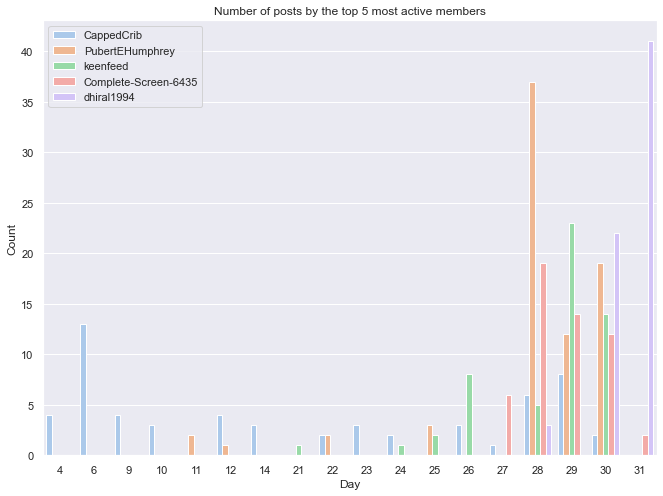

In [19]:
ax = sns.barplot(data= top_5_active_authors_posts_per_day_in_January, x='day', y= 'count', hue='author')
ax.set(xlabel = 'Day', ylabel = 'Count', title = 'Number of posts by the top 5 most active members')
plt.legend(loc='upper left');

### Insights

- From the above bar plot, the most consistent author is CappedCrib, who has been regular at posting.

- There isn't much here to help us answer if there were any influential authors/followers.

- Let's look at some of their posts.

In [20]:
top_5_active_authors[top_5_active_authors.author == 'dhiral1994'].sort_values(['day'])

,id,title,author,created_datetime,day
249851,l6m2jg,Mark Cuban LOVE LOVE WSB!!!! 🚀🚀🚀🚀🚀🚀,dhiral1994,2021-01-28 08:20:22,28
226210,l6wkpo,No GME! No Robinhood! 😑😑,dhiral1994,2021-01-28 18:59:06,28
195014,l70znt,BATMAN ON GME! 🚀🚀🚀🚀🚀🚀🚀,dhiral1994,2021-01-28 21:45:17,28
47239,l8bv6m,"""I'm Going to Make a Fortune""- WWE Superstar J...",dhiral1994,2021-01-30 08:15:16,30
24188,l8s3zf,Not Cool! Is he bribing now?? Upvote to let pe...,dhiral1994,2021-01-30 23:59:47,30
...,...,...,...,...,...
13097,l8yzrd,Let's say GME teamed up with AMC to put video ...,dhiral1994,2021-01-31 05:10:23,31
13655,l8ynvf,$50 billion in losses to hedge funds since Jan...,dhiral1994,2021-01-31 04:54:13,31
15132,l8xqm8,NZ investors caught up in stock surge: NZ INVE...,dhiral1994,2021-01-31 04:11:11,31
17080,l8wksi,"$35,000/y to MILLIONAIRE!! Missouri man now a ...",dhiral1994,2021-01-31 03:16:39,31


In [21]:
top_5_active_authors[(top_5_active_authors.author == 'CappedCrib') & (top_5_active_authors.day >= 26)].sort_values(['day'])

,id,title,author,created_datetime,day
300180,l4xytv,"You crazy bastards, you did it.",CappedCrib,2021-01-26 02:54:45,26
299480,l4zaj4,"You sons of bitches, you did it.",CappedCrib,2021-01-26 03:56:04,26
299613,l4z17f,"You sons of bitches, you did it.",CappedCrib,2021-01-26 03:43:41,26
277957,l69nza,If you’re curious as to whether or not we’re b...,CappedCrib,2021-01-27 22:57:48,27
243706,l6om4f,"Thanks for the cheese, Gabe.",CappedCrib,2021-01-28 10:35:19,28
241499,l6ppg0,"Sorry for stealing your coke money, Wall Street.",CappedCrib,2021-01-28 11:39:29,28
241349,l6pshk,Don’t let any of the talking heads on CNBC gui...,CappedCrib,2021-01-28 11:44:34,28
240326,l6qd2i,Even my girlfriend has been following along on...,CappedCrib,2021-01-28 12:22:02,28
240232,l6qf7h,Even my girlfriend supports the cause,CappedCrib,2021-01-28 12:26:08,28
220409,l6xkxm,DO NOT LET THESE SLIMY FUCKS SHAKE YOU OUT,CappedCrib,2021-01-28 19:42:36,28


## The final question : What were the most common phrases used by the authors.

I am sure it would be "TO THE MOON" but would be interesting to see what the others are.

In [22]:
wallstreet_2021_comments_cleaned = wallstreet_filtered_2021.title.apply(lambda c : ''.join([x for x in str(c).lower() if x.isalnum() or x.isspace()]))
wallstreet_2021_comments_cleaned.head()

0    are you guys idiots the sub has been brigaded ...
1                                 your game stops here
2      udeepfuckingvalue dropping knowledge on the sub
3                          theyll learn give them time
4                                       invest  stocks
Name: title, dtype: object

In [23]:
def get_ngrams(text, n):
    ''' Function to create a ngram of given n for a piece of text

    INPUT
    text - string, any text to create ngrams for
    n    - int, the n in the ngram i.e n = 2 will create set of all possible phrases of 2 words

    OUTPUT
    list of strings, each string being a phrase of n words
    '''
    grams = ngrams(word_tokenize(text), n)
    return [' '.join(gram) for gram in grams]

In [24]:
def get_top_n_phrases(phrase_series, gram_n = 3, top_n = 10):
    ''' Function to get the top phrases of the specified ngram length for a series of text
    
    INPUT
    phrase_series - pandas series, a series of text for which a count of all phrases of n words is require
    gram_n        - int, default 3, the n in the ngram i.e gram_n = 2 will create set of all possible phrases of 2 words
    top_n         - int, default 10, the number of top results to return

    OUTPUT
    a pandas dataframe, with two columns (phrase, count) where phrase is the phrase of gram_n words and top_n number of rows
    '''
    phrase_list = phrase_series.apply(get_ngrams, args=(gram_n,))
    phrase_dict = {}
    for ele in phrase_list:
        for phrase in ele:
            phrase_dict.update({phrase: phrase_dict.get(phrase, 0) + 1})
    return pd.DataFrame(sorted(phrase_dict.items(), key=lambda item: item[1], reverse=True)[:top_n], columns= ['phrase', 'count'])

In [25]:
# we will look at 2, 3, 4, and 5 word phrases
five_word_phrases = get_top_n_phrases(wallstreet_2021_comments_cleaned, 5)
four_word_phrases = get_top_n_phrases(wallstreet_2021_comments_cleaned, 4)
three_word_phrases = get_top_n_phrases(wallstreet_2021_comments_cleaned, 3)
two_word_phrases = get_top_n_phrases(wallstreet_2021_comments_cleaned, 2)

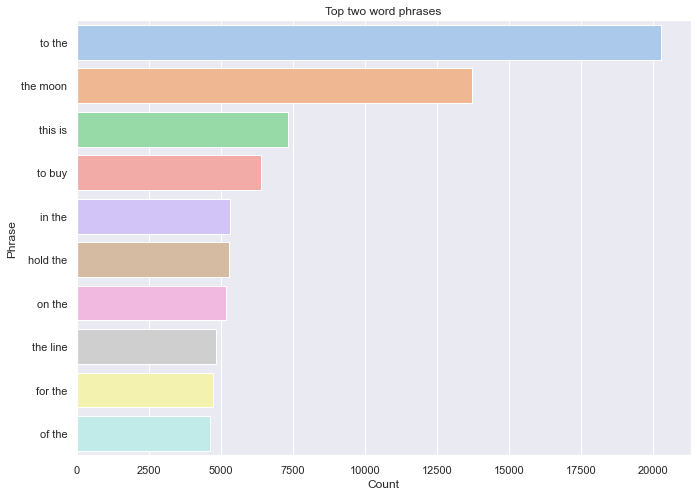

In [26]:
ax = sns.barplot(data = two_word_phrases, x = 'count', y = 'phrase')
ax.set(xlabel = 'Count', ylabel = 'Phrase', title = 'Top two word phrases');

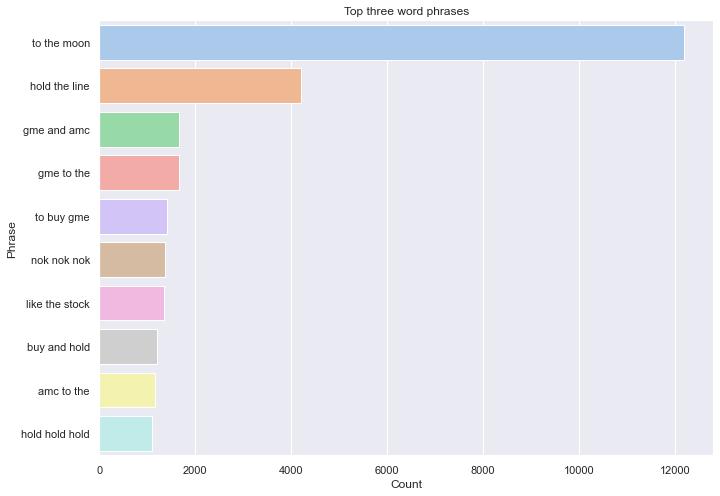

In [27]:
ax = sns.barplot(data = three_word_phrases, x = 'count', y = 'phrase')
ax.set(xlabel = 'Count', ylabel = 'Phrase', title = 'Top three word phrases');

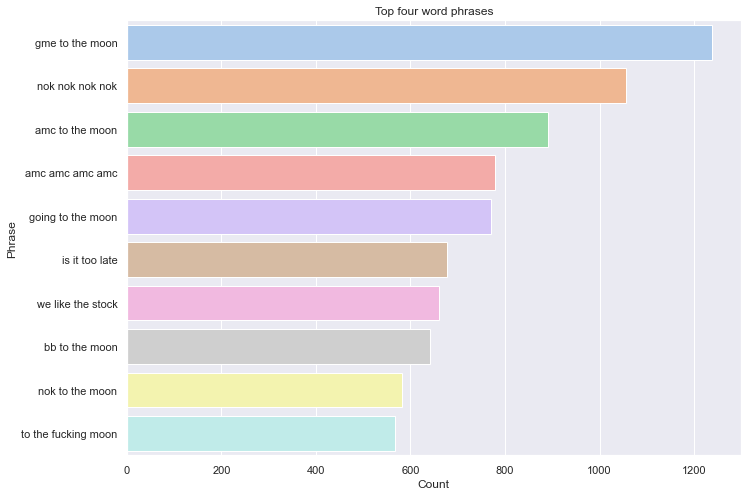

In [28]:
ax = sns.barplot(data = four_word_phrases, x = 'count', y = 'phrase')
ax.set(xlabel = 'Count', ylabel = 'Phrase', title = 'Top four word phrases');

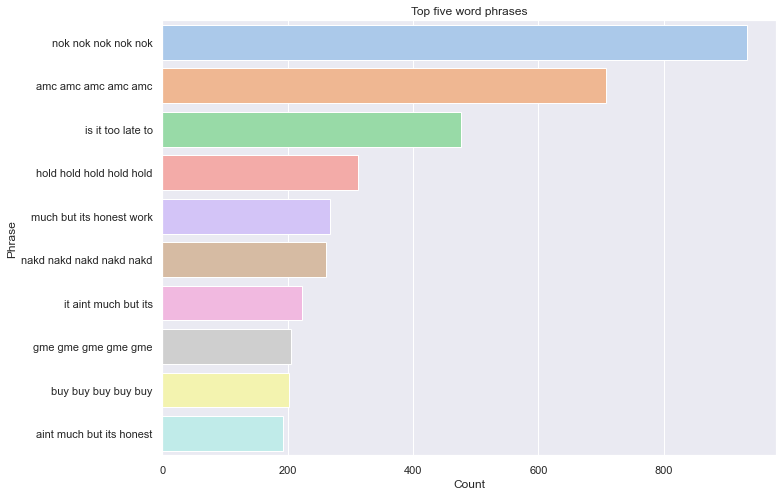

In [30]:
ax = sns.barplot(data = five_word_phrases, x = 'count', y = 'phrase')
ax.set(xlabel = 'Count', ylabel = 'Phrase', title = 'Top five word phrases');

### Insights

- No suprises here.

- "to the moon" is the clear winner.

- "amc amc amc", "hold hold hold", "gme gme gme" - these redditors love to repeat the same word over and over.

- "is it too late", people trying to get into the action.

- The other thing I would have loved to look for is if someone tried to sneak in a stock/crypto other than GME, AMC, NOK and DOGE in order to get the redditors backing. But that is it for now.